<div align="center">
  <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" width="70%" style="min-width: 300px; max-width: 600px;">
  <h1>INF396 - Introducción a la Ciencia de Datos</h1>
  <h3 style="color: #555;">Tarea #1</h3>
  <p>
    <strong>Nombre-1</strong><br>
    <em>Rol-1</em><br>
    <em>correo-1@usm.cl</em>
  </p><br>
  <p>
    <strong>Nombre-2</strong><br>
    <em>Rol-2</em><br>
    <em>correo-2@usm.cl</em>
  </p><br>
  <p>
    <strong>Nombre-3</strong><br>
    <em>Rol-3</em><br>
    <em>correo-3@usm.cl</em>
  </p>
</div>

<hr>

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

# Load Datasets

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
fashion = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
kuzushiji = fetch_openml('Kuzushiji-49', version=1, as_frame=False)

In [3]:
X_mni, y_mni = mnist.data, mnist.target.astype(int)
X_fas, y_fas = fashion.data, fashion.target.astype(int)
X_kuz, y_kuz = kuzushiji.data, kuzushiji.target.astype(int)

# Question 1

# Question 2

# Question 3

## Inject Noise

In [4]:
X_images_mni = X_mni.reshape(-1, 28, 28)
X_images_fas = X_fas.reshape(-1, 28, 28)
X_images_kuz =  X_kuz.reshape(-1, 28, 28)

In [5]:
def plot_noisy_images(original, noisy, title):
    plt.figure(figsize=(10, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(original[i], cmap='gray')
        plt.axis('off')
        plt.subplot(2, 5, i+6)
        plt.imshow(noisy[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

In [6]:
def add_gaussian_noise(images, mean=0, std=0.6):
    noise = np.random.normal(mean, std, size=images.shape)
    noisy_images = np.clip(images + noise, 0, 1)
    return noisy_images

def add_beta_noise(images, alpha=0.5, beta=0.5, scale=0.2):
    noise = np.random.beta(alpha, beta, size=images.shape)
    noisy_images = np.clip(images + scale * (noise - 0.5), 0, 1)
    return noisy_images

def add_chisquare_noise(images, df=1, scale=0.1):
    noise = np.random.chisquare(df, size=images.shape)
    noisy_images = np.clip(images + scale * noise, 0, 1)
    return noisy_images

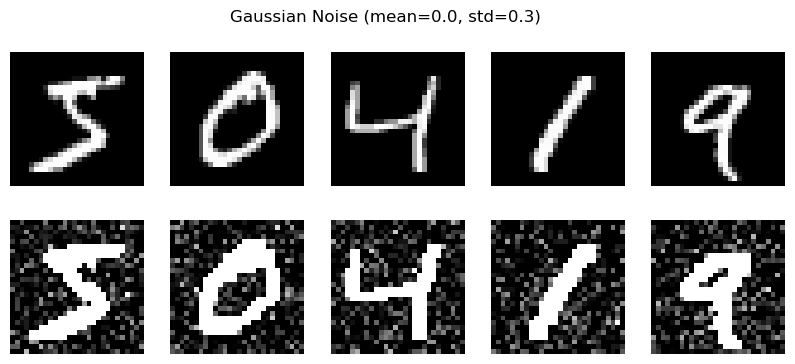

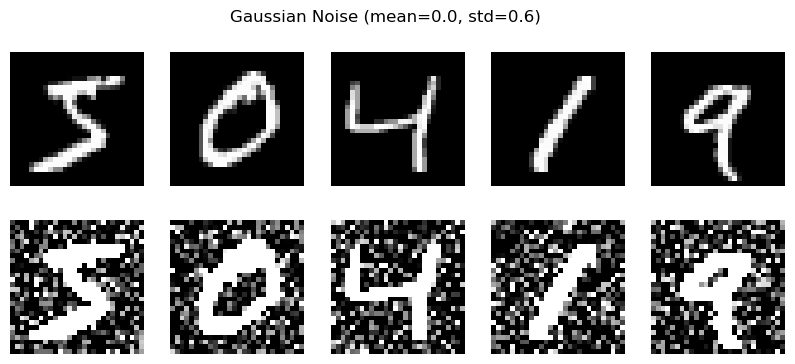

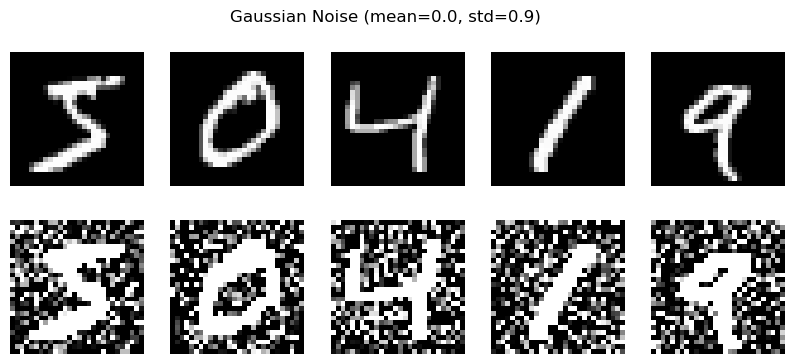

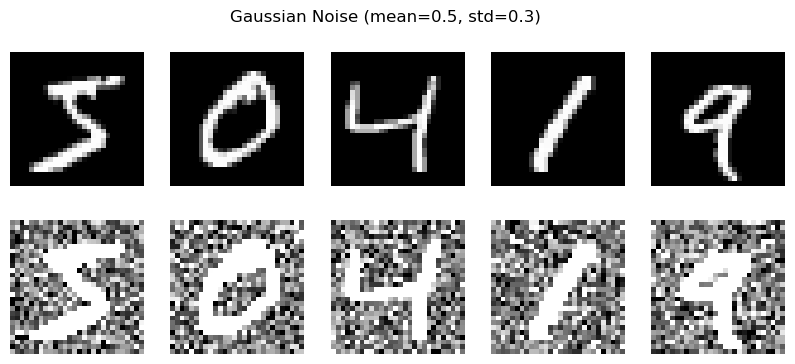

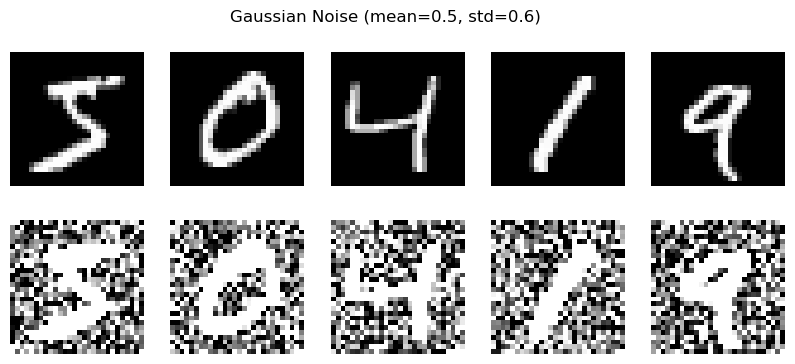

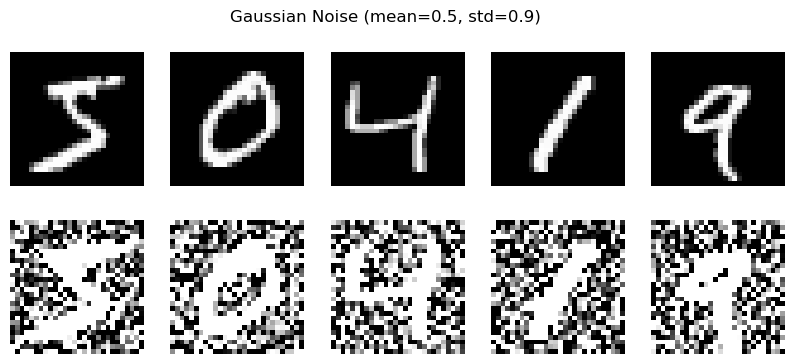

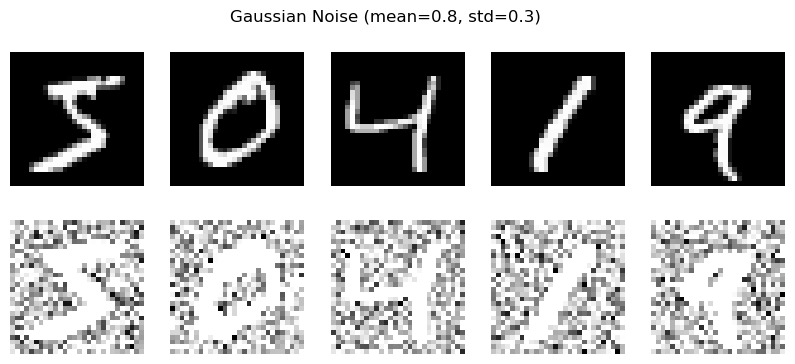

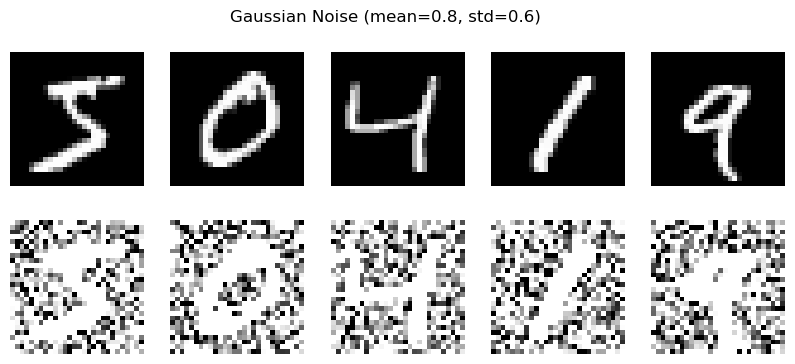

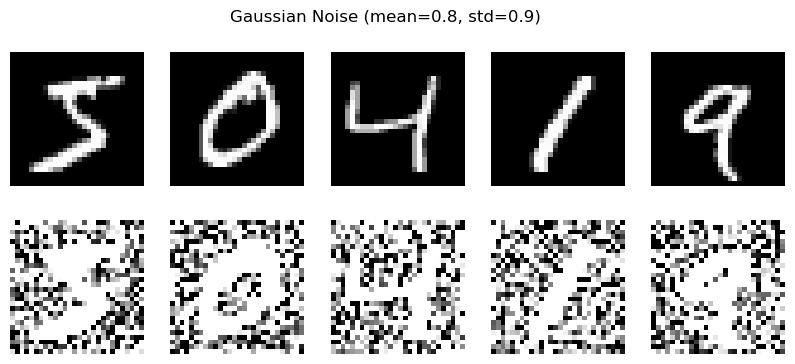

In [7]:
for mean_i in [.0, 0.5, 0.8]:
    for std_i in [0.3, 0.6, 0.9]:
        X_gaussian = add_gaussian_noise(X_images_mni, mean=mean_i, std=std_i)
        plot_noisy_images(X_images_mni, X_gaussian, f"Gaussian Noise (mean={mean_i}, std={std_i})")

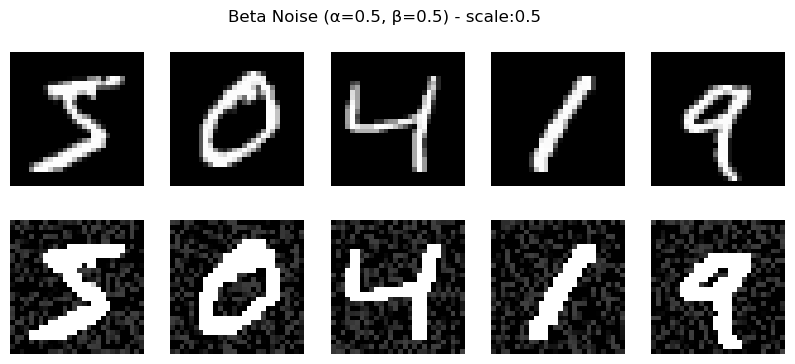

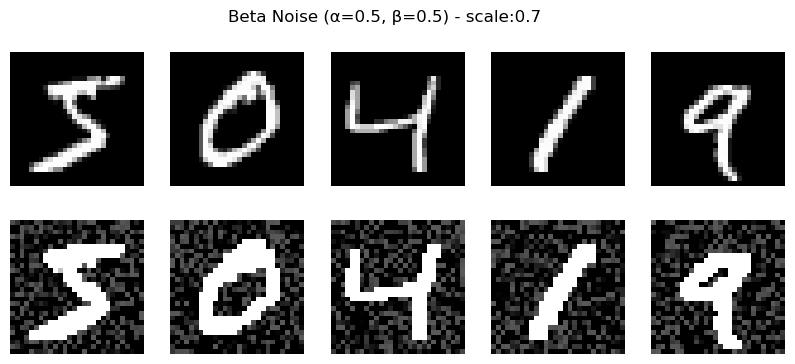

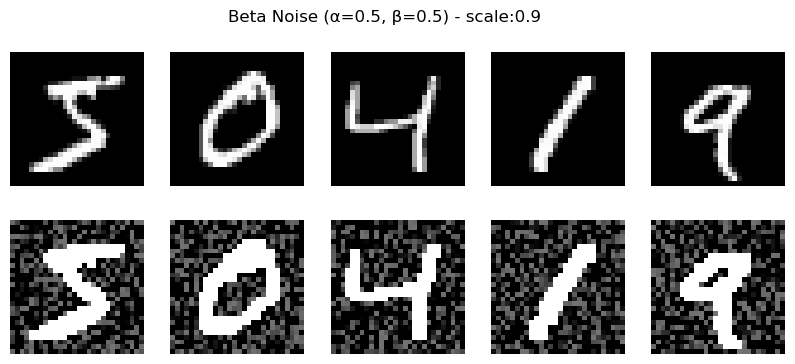

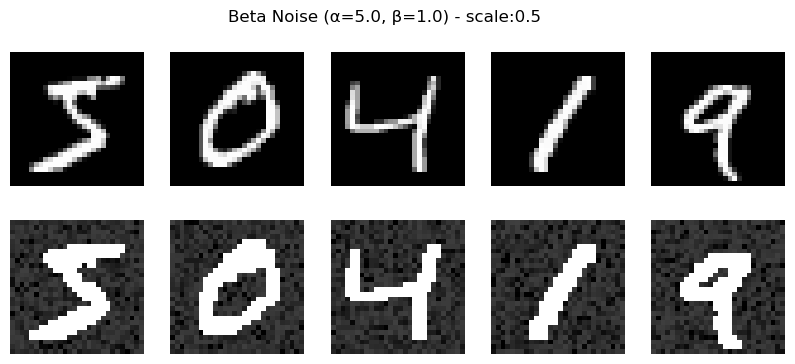

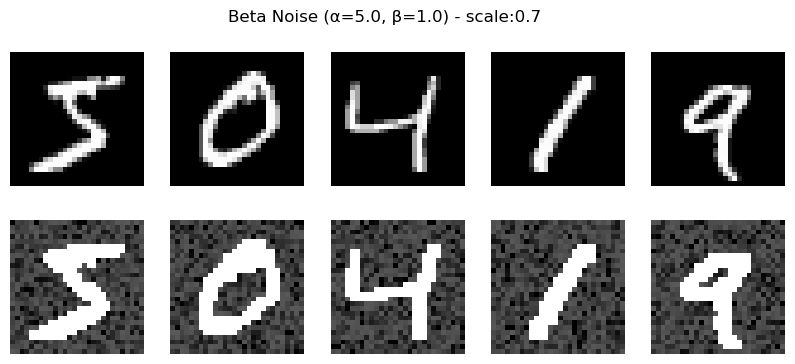

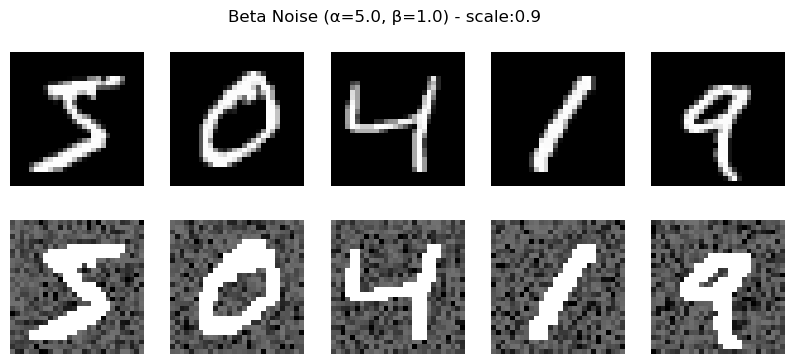

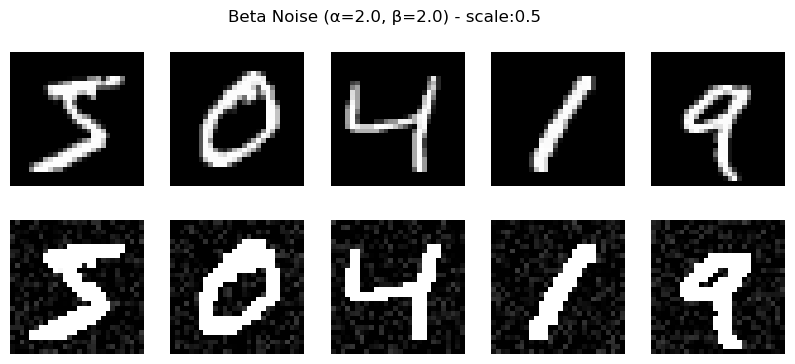

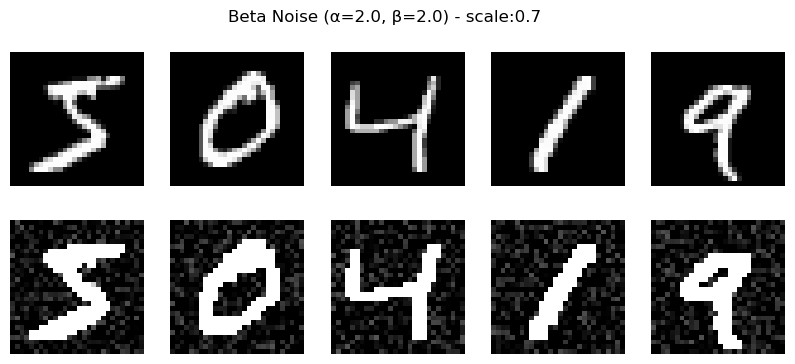

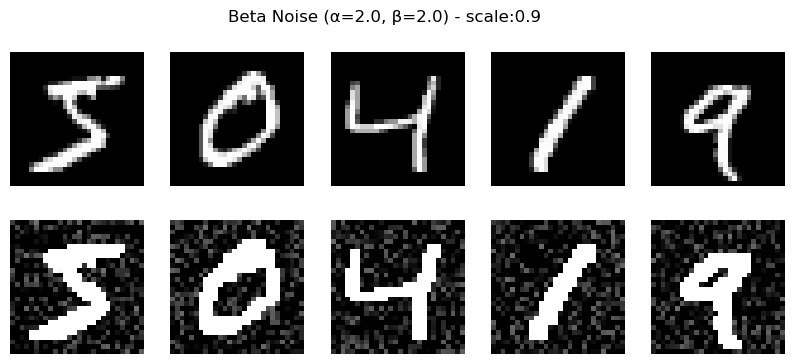

In [8]:
for alpha_i, beta_i in [(0.5,0.5), (5.,1.), (2., 2.)]:
    for scale_i in [0.5, 0.7, 0.9]:
        X_beta = add_beta_noise(X_images_mni, alpha=alpha_i, beta=beta_i, scale=scale_i)
        plot_noisy_images(X_images_mni, X_beta, f"Beta Noise (α={alpha_i}, β={beta_i}) - scale:{scale_i}")

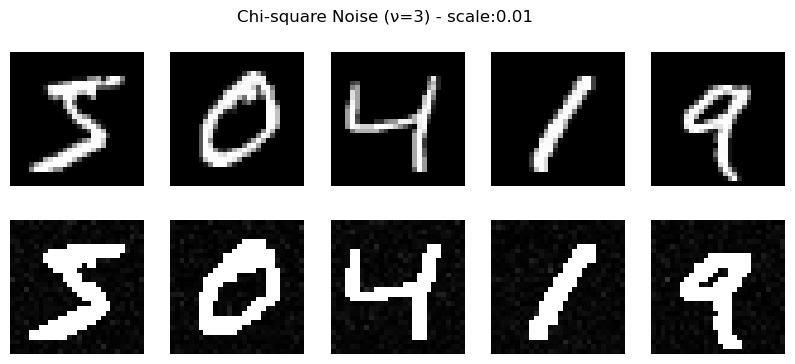

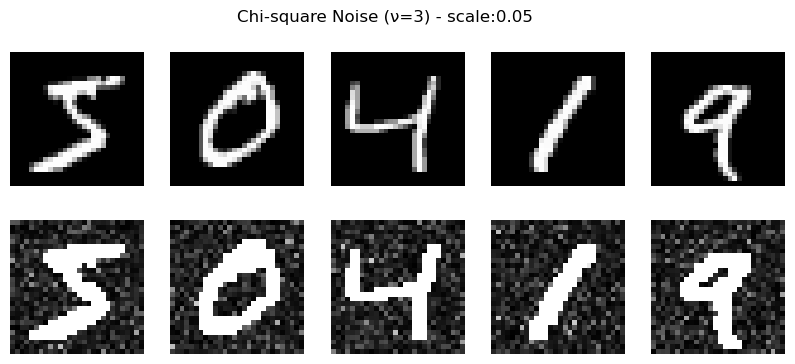

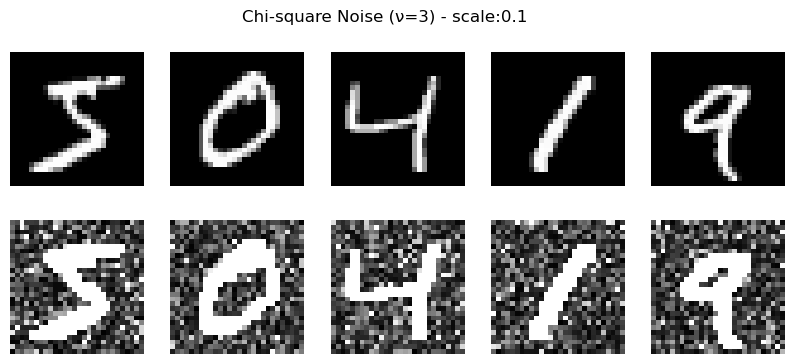

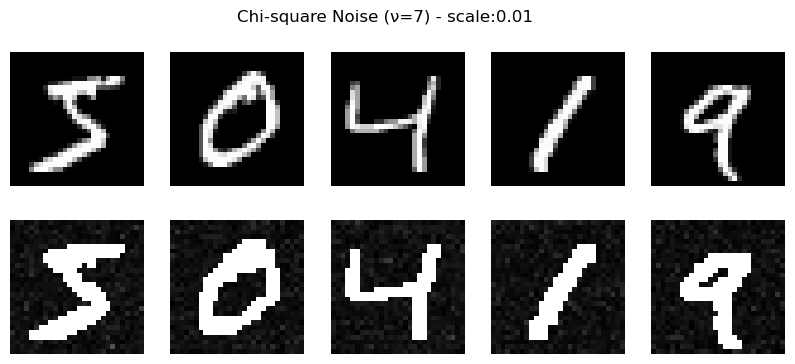

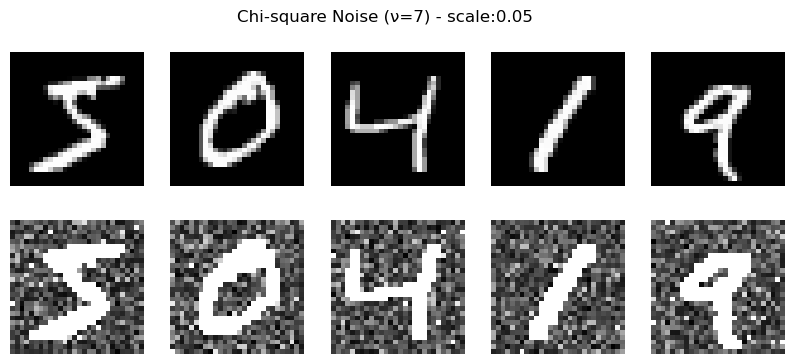

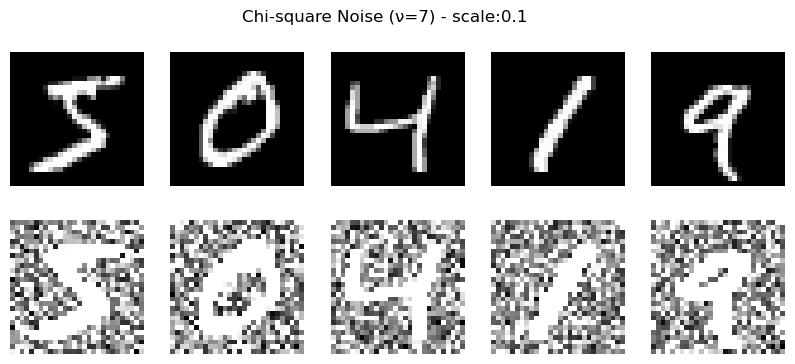

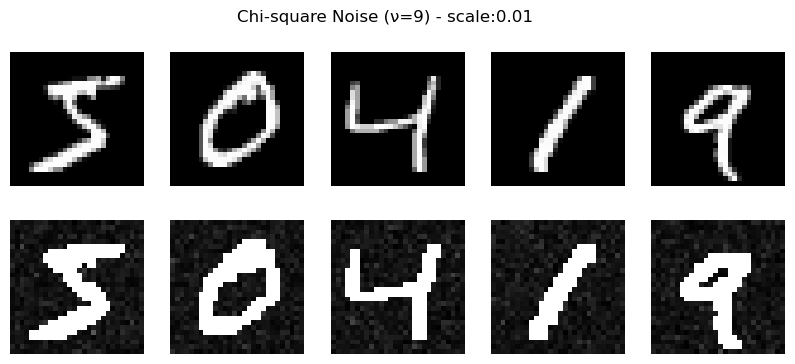

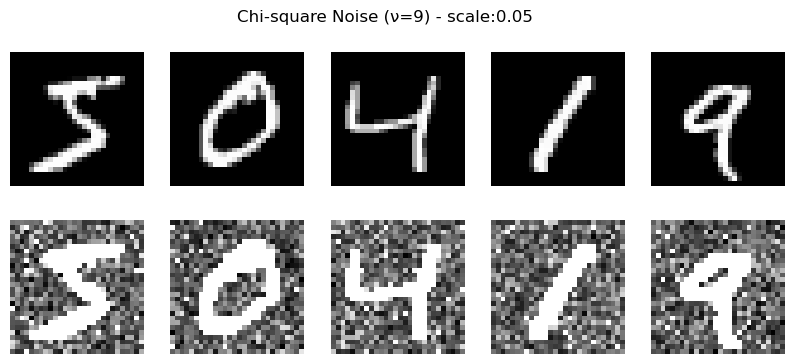

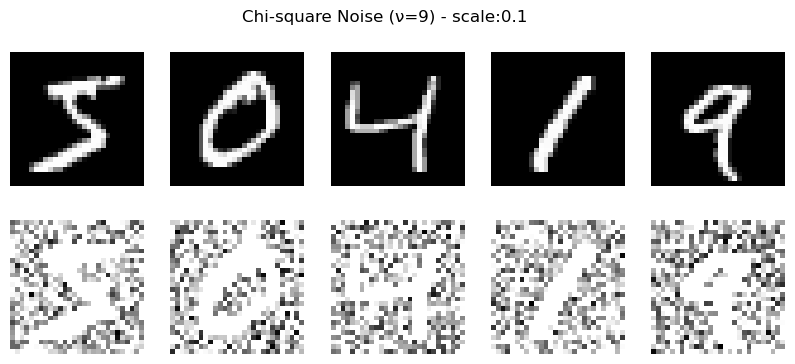

In [9]:
for df_i in [3, 7, 9]:
    for scale_i in [0.01, 0.05, 0.1]:
        X_chisq = add_chisquare_noise(X_images_mni, df=df_i, scale=scale_i)
        plot_noisy_images(X_images_mni, X_chisq, f"Chi-square Noise (ν={df_i}) - scale:{scale_i}")

In [10]:
# Nota: Para restaurar el orden de dimensiones original (muestras, features), usar:
# X_chisq_mni = X_chisq.reshape(-1, 784)